# OUTDATED, the examples moved to the gallery
## See https://empymod.github.io/emg3d-gallery

----

# Runtime

Measure runtime usage of `emg3d` as a function of model size (using 1 thread).

In [1]:
import emg3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.matplotlib.rcParams['figure.dpi'] = 300
plt.matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
nsizes = np.array([32, 48, 64, 96, 128, 192, 256, 384])
cpu_average = np.zeros(nsizes.shape)

for i, nx in enumerate(nsizes):
    
    print(f"  == {nx}^3 ~ {nx**3:4.2e} cells ==\n")

    # Grid
    hx = np.ones(nx)*50
    x0 = -nx//2*50
    grid = emg3d.utils.TensorMesh([hx, hx, hx], x0=(x0, x0, x0))

    # Source location and frequency
    src = [0, 0, 0, 0, 0] 
    freq = 1.0
        
    # Model and source field
    model = emg3d.utils.Model(grid, 1., freq=freq)
    sfield = emg3d.utils.get_source_field(grid, src, freq=freq, strength=0)
    
    if nx < 96:  # r = 1; n estimated by timeit
        cpu = %timeit -r 1 -o -q emg3d.solver.solver(grid, model, sfield, verb=1)
    else:        # r = 1; n = 1 (takes too long otherwise)
        cpu = %timeit -r 1 -n 1 -o -q emg3d.solver.solver(grid, model, sfield, verb=1)

    cpu_average[i] = cpu.average
    
    print(f"  CPU: {cpu_average[i]:5.1f} s\n")

  == 32^3 ~ 3.28e+04 cells ==

  CPU:   1.3 s

  == 48^3 ~ 1.11e+05 cells ==

  CPU:   4.5 s

  == 64^3 ~ 2.62e+05 cells ==

  CPU:  10.6 s

  == 96^3 ~ 8.85e+05 cells ==

  CPU:  36.3 s

  == 128^3 ~ 2.10e+06 cells ==

  CPU:  90.6 s

  == 192^3 ~ 7.08e+06 cells ==

  CPU: 311.9 s

  == 256^3 ~ 1.68e+07 cells ==

  CPU: 758.7 s

  == 384^3 ~ 5.66e+07 cells ==

  CPU: 2727.8 s



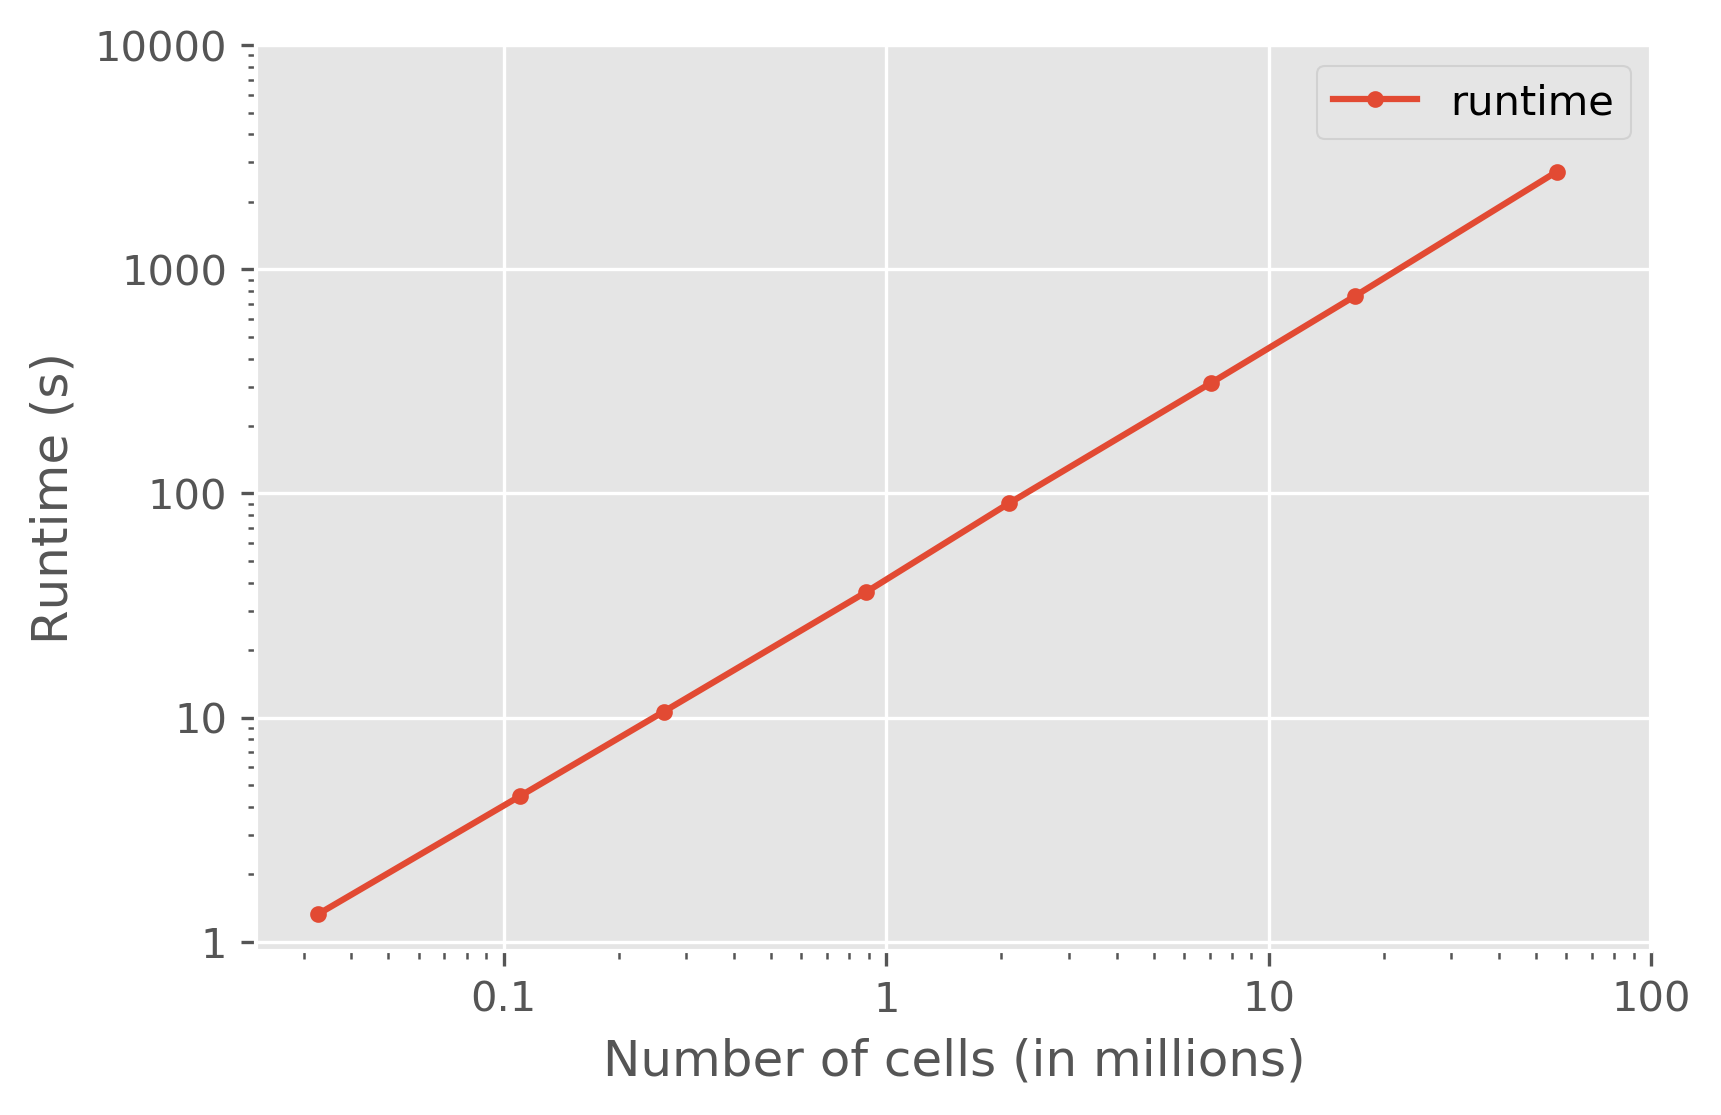

In [4]:
plt.figure()
plt.loglog(nsizes**3/1e6, cpu_average, '.-', label='runtime')
plt.legend()
plt.xlabel('Number of cells (in millions)')
plt.ylabel('Runtime (s)')
plt.xticks([1e-1, 1e0, 1e1, 1e2], ('0.1', '1', '10', '100'))
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4], ('1', '10', '100', '1000', '10000'))
plt.savefig('runtime.svg', facecolor='none', edgecolor='none', bbox_inches='tight')
plt.show()

In [5]:
emg3d.Report()

--------------------------------------------------------------------------------
  Date: Fri Jul 05 13:28:44 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.6 GB : RAM
           Jupyter : Environment

  Python 3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC 7.3.0]

            1.16.4 : numpy
             1.2.1 : scipy
            0.44.1 : numba
             0.7.0 : emg3d
             7.6.0 : IPython
             3.1.0 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------